In [1]:
import sys
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import config
import utility.df
import utility.iolib
import utility.plotlib

#env = sys.argv[1] if len(sys.argv) > 2 else "dev"

Complete loading data for subscription and lesson history!
Start preparing the time-series data for subscription.
Prepare data for active subscriptions.


100%|██████████| 3305/3305 [00:00<00:00, 15063.10it/s]


Prepare data for counts of cancellations, returns, renewals and new subscriptions.


100%|██████████| 5685/5685 [00:28<00:00, 199.04it/s]


Due to configuration, data as of unsteady period have been removed!


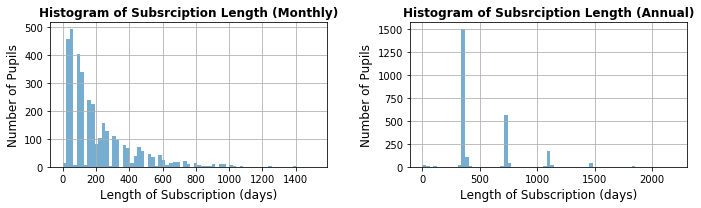

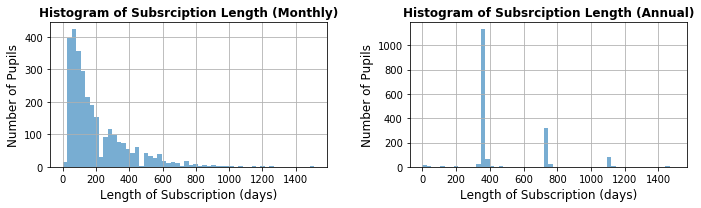

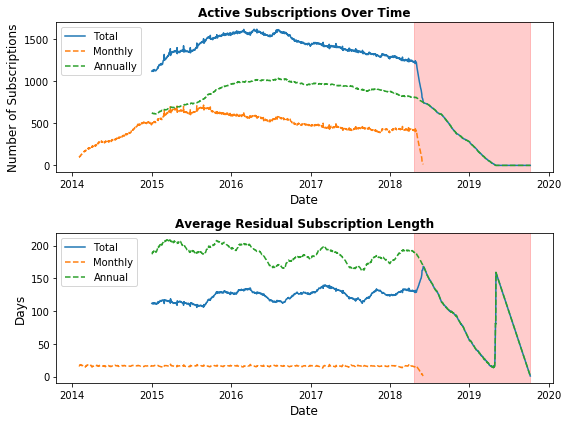

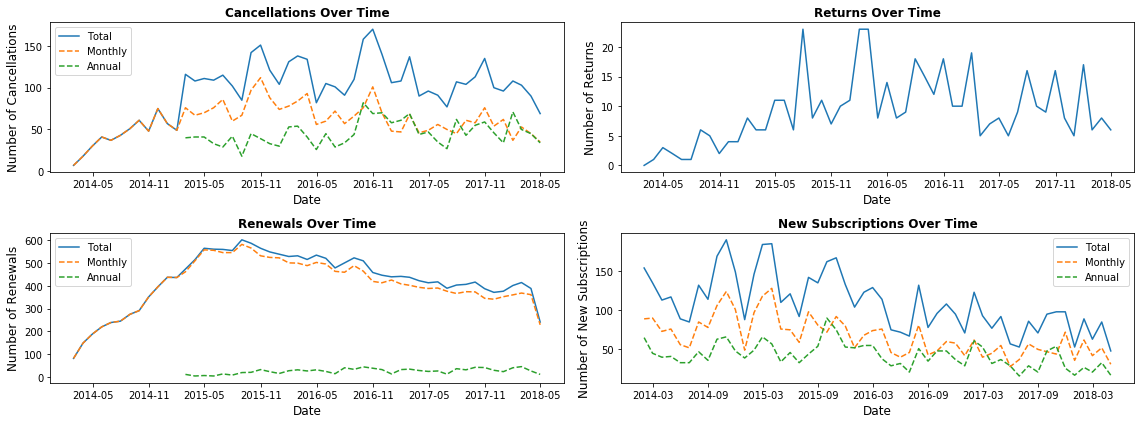

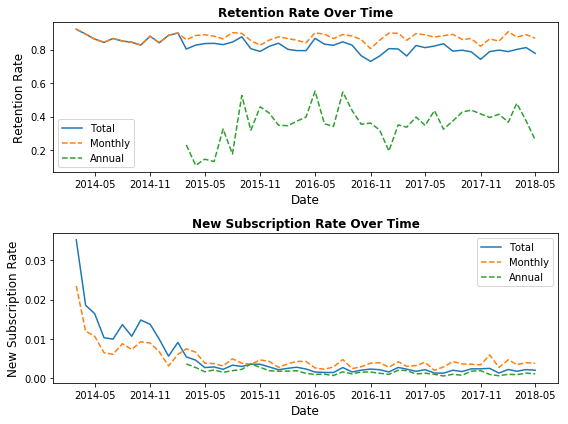

In [3]:
# Setup configuration
cfg = config.ResearchConfig
time_format = cfg.CSV_TIME_FORMAT
date_format = cfg.CSV_DATE_FORMAT
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE, format=cfg.CSV_DATE_FORMAT)

# Retrieve data
df_subspt, df_lesson, _, _, df_pupils = utility.iolib.retrieve_data(cfg)
print("Complete loading data for subscription and lesson history!")

# Distribution of subscription length per pupil
utility.plotlib.subspt_dist(df_subspt, cfg)
utility.plotlib.subspt_dist_cancelled(df_subspt, cfg)

print("Start preparing the time-series data for subscription.")
df_subspt_timeseries = utility.df.subspt_timeseries(df_subspt, cfg)

# Active subscriptions over time
# Average remaining subscription length
utility.plotlib.active_subspt(df_subspt_timeseries, cfg)

# Performace of subscriptions: count of cancellations, returns, renewals and new-subscriptions
utility.plotlib.performance_count(df_subspt_timeseries, cfg)
# Performace of subscriptions: retention rate, new subscription rate
utility.plotlib.performance_ratio(df_subspt_timeseries, cfg)

In [4]:
pupil_list_mon = df_subspt[df_subspt.subscription_type==cfg.TYPE_MONTHLY].pupilId.unique()
pupil_list_ann = df_subspt[df_subspt.subscription_type==cfg.TYPE_ANNUAL].pupilId.unique()
print('Number of mon/thly subscribers = {}'.format(len(pupil_list_mon)))
print('Number of annual subscribers = {}'.format(len(pupil_list_ann)))

Number of mon/thly subscribers = 3504
Number of annual subscribers = 2525


In [5]:
print("Number of subscribers switching from monthly to annual = {}.".format(df_subspt_timeseries.num_rnl_m2a.sum()))
print("Number of subscribers switching from annual to monthly = {}.".format(df_subspt_timeseries.num_rnl_a2m.sum()))

num_rtn = df_subspt_timeseries.num_rtn_a2a.sum() + df_subspt_timeseries.num_rtn_a2m.sum() + \
          df_subspt_timeseries.num_rtn_m2a.sum() + df_subspt_timeseries.num_rtn_m2m.sum()
print("Number of subscribers returning = {}".format(num_rtn))

Number of subscribers switching from monthly to annual = 241.0.
Number of subscribers switching from annual to monthly = 6.0.
Number of subscribers returning = 479.0


In [6]:
# Pupils' age
map_dob = dict(zip(df_pupils.index.values, df_pupils['dob'].values))

In [7]:
map_dob

{655045: datetime.date(2006, 3, 15),
 655621: datetime.date(2004, 2, 8),
 655695: datetime.date(2003, 2, 27),
 655886: datetime.date(2009, 3, 27),
 655895: datetime.date(2008, 1, 17),
 655939: datetime.date(2009, 5, 15),
 655975: datetime.date(2004, 8, 24),
 656947: datetime.date(2005, 10, 11),
 657009: datetime.date(2005, 2, 23),
 657092: datetime.date(2002, 12, 16),
 658078: datetime.date(2008, 7, 4),
 658323: datetime.date(2008, 9, 5),
 658484: datetime.date(2004, 10, 15),
 658743: datetime.date(2004, 11, 6),
 658910: datetime.date(2003, 7, 7),
 659281: datetime.date(2005, 12, 7),
 659696: datetime.date(2004, 9, 12),
 659770: datetime.date(2006, 7, 19),
 660038: datetime.date(2005, 2, 11),
 660060: datetime.date(2003, 7, 3),
 660299: datetime.date(2007, 3, 3),
 660394: datetime.date(2009, 9, 24),
 660413: datetime.date(2005, 8, 22),
 660417: datetime.date(2006, 2, 17),
 660437: datetime.date(2006, 3, 16),
 660444: datetime.date(2006, 9, 21),
 660449: datetime.date(2008, 6, 16),
 660